In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

### 1. Data Processing

In [2]:
# Import the data
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)
adult_df.shape

(32561, 15)

In [3]:
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
# Add column names
list_of_columns = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship"
                   ,"race","sex","capital_gain","capital_loss","hours_per_week","native_country","salary"]
adult_df.columns = list_of_columns
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Check the dataframe shape
adult_df.shape

(32561, 15)

In [6]:
# Drop the 3rd column from the data ("fnlwgt")
adult_df.drop(['fnlwgt'], axis=1, inplace=True)
adult_df.shape

(32561, 14)

In [7]:
# Find the special characters in the data frame 
adult_df.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
salary               0
dtype: int64

In [8]:
# Replace the special character to nan 
#adult_df['native_country'] = adult_df['native_country'].replace('?',np.nan)
#adult_df['workclass'] = adult_df['workclass'].replace('?',np.nan)
#adult_df['occupation'] = adult_df['occupation'].replace('?',np.nan)

In [9]:
# mapping the salary into numerical data using map function
adult_df['salary'] = adult_df['salary'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [10]:
# Create X & y objects 
cols = list(adult_df.columns.values) 
cols.pop(cols.index('salary')) 
X = adult_df[cols] 
y = adult_df['salary']

print(X.shape, y.shape)

(32561, 13) (32561,)


In [11]:
# One-hot encoding X
X_encoded = pd.get_dummies(X)
#X=pd.get_dummies(X,columns=features)
print(X_encoded.shape, y.shape)


(32561, 107) (32561,)


In [12]:
# Generate X_train, X_test, y_train & y_test. Use 70% for train & 30% for test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

### 2. Random Forest Classifier - Base Model

In [13]:
# Fit the RandomForestClassifier model on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Use the fitted model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
y_pred_proba_answer = y_pred_proba[:,1]

print(y_pred[:10])
print(y_pred_proba[:10])
print(y_pred_proba_answer[:10])

[0 1 1 0 0 1 1 0 0 1]
[[1.         0.        ]
 [0.34833333 0.65166667]
 [0.251      0.749     ]
 [1.         0.        ]
 [0.96       0.04      ]
 [0.06       0.94      ]
 [0.08       0.92      ]
 [1.         0.        ]
 [0.94       0.06      ]
 [0.19062692 0.80937308]]
[0.         0.65166667 0.749      0.         0.04       0.94
 0.92       0.         0.06       0.80937308]


In [15]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

[[6828  627]
 [ 873 1441]]


In [16]:
# Calculate the roc_auc_score for this model
print(roc_auc_score(y_test, y_pred_proba_answer))

0.8889081826018049


Feature: 0, Score: 0.22062
Feature: 1, Score: 0.06735
Feature: 2, Score: 0.09857
Feature: 3, Score: 0.03264
Feature: 4, Score: 0.11370
Feature: 5, Score: 0.00212
Feature: 6, Score: 0.00627
Feature: 7, Score: 0.00666
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.01224
Feature: 10, Score: 0.00661
Feature: 11, Score: 0.00972
Feature: 12, Score: 0.00533
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00166
Feature: 15, Score: 0.00229
Feature: 16, Score: 0.00102
Feature: 17, Score: 0.00029
Feature: 18, Score: 0.00084
Feature: 19, Score: 0.00236
Feature: 20, Score: 0.00144
Feature: 21, Score: 0.00301
Feature: 22, Score: 0.00347
Feature: 23, Score: 0.01318
Feature: 24, Score: 0.00405
Feature: 25, Score: 0.00913
Feature: 26, Score: 0.00871
Feature: 27, Score: 0.00004
Feature: 28, Score: 0.00457
Feature: 29, Score: 0.00586
Feature: 30, Score: 0.00773
Feature: 31, Score: 0.00040
Feature: 32, Score: 0.07508
Feature: 33, Score: 0.00098
Feature: 34, Score: 0.02848
Feature: 35, Score: 0.00162
Fe

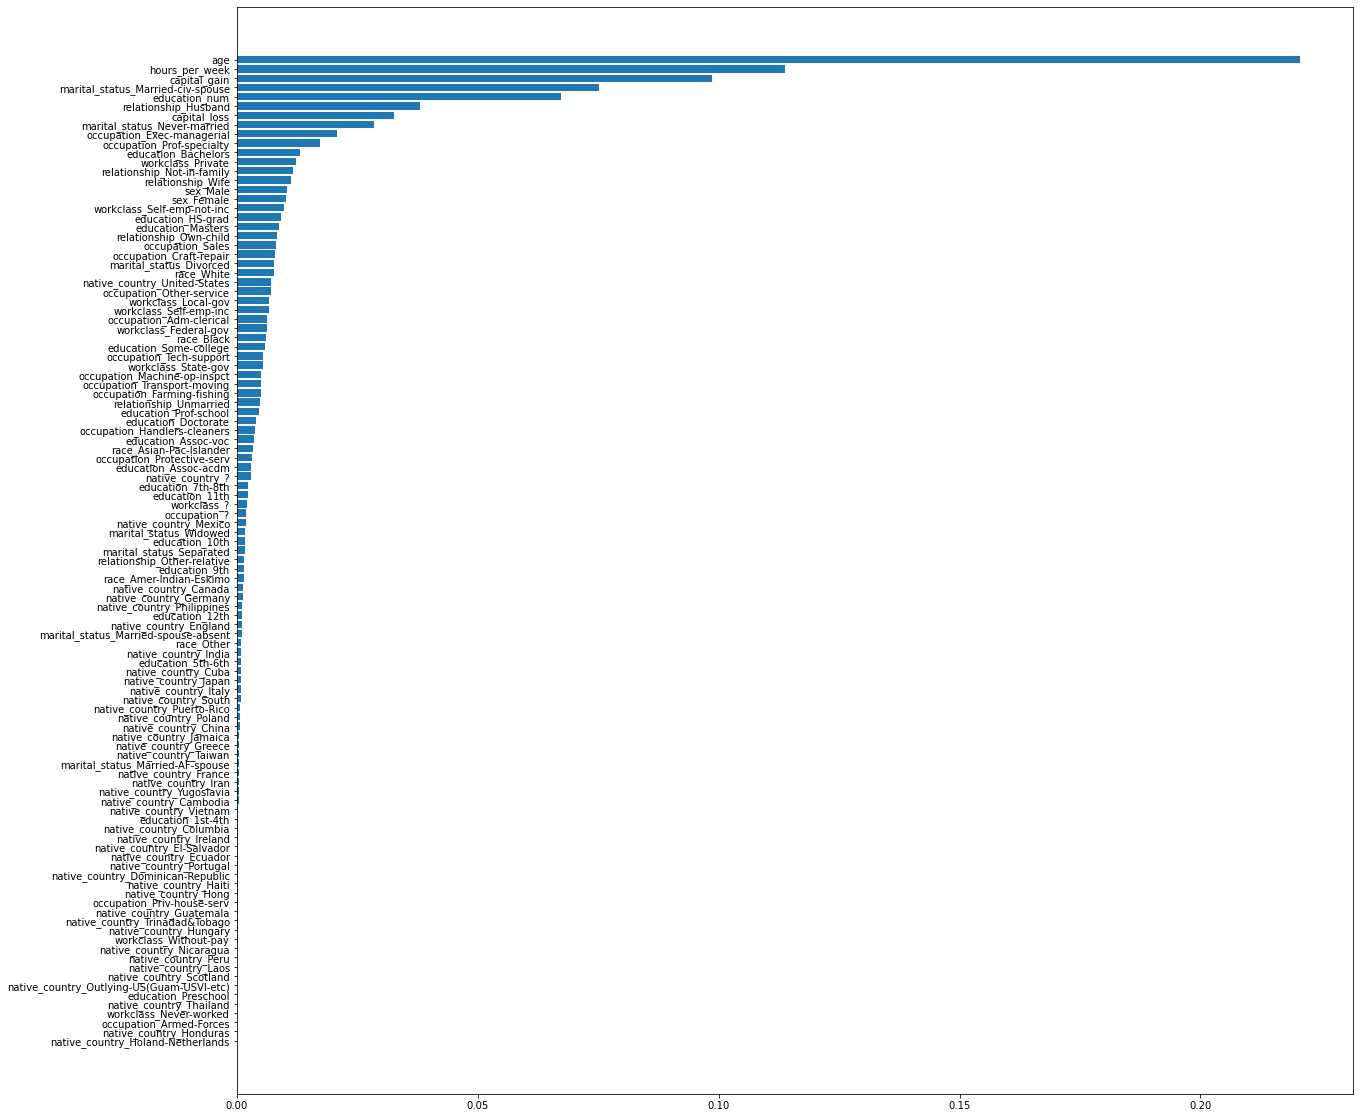

In [17]:
# Identify the top 5 features
# get importance
importance = rf.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(20, 20))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

# From the graph below, we know that the top 5 features are:
# age, hours_per_week, capital_gain, marital_status_Married-civ-spouse, and education_num

In [18]:
# Calculate predictions for the training data & build the classification report & roc_auc_score. 
y_pred_train = rf.predict(X_train)
y_pred_train_proba = rf.predict_proba(X_train)
y_pred_train_proba_answer = y_pred_train_proba[:,1]

print(y_pred_train[:10])
print(y_pred_train_proba[:10])
print(y_pred_train_proba_answer[:10])

[0 1 0 0 0 0 1 0 0 0]
[[0.85  0.15 ]
 [0.08  0.92 ]
 [0.94  0.06 ]
 [1.    0.   ]
 [1.    0.   ]
 [0.963 0.037]
 [0.14  0.86 ]
 [0.98  0.02 ]
 [0.95  0.05 ]
 [1.    0.   ]]
[0.15  0.92  0.06  0.    0.    0.037 0.86  0.02  0.05  0.   ]


In [19]:
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(roc_auc_score(y_train, y_pred_train_proba_answer))

# Are there signs of overfitting? Why or why not?
# There is a sign of overfitting since the training accuracy is way higher than the testing one. 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17265
           1       0.97      0.95      0.96      5527

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792

[[17103   162]
 [  272  5255]]
0.9979123677457127


### 3. AdaBoost Classifier - GridSearch

In [20]:
# Create a simple AdaBoostClassifier only using default parameters
abc = AdaBoostClassifier(random_state=42)

In [21]:
# Look at parameters used by our current abc model
print('Parameters currently in use:\n')
pprint(abc.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}


In [22]:
n_estimators = [100, 200, 300, 400]
learning_rate = [0.2,0.4,0.6,0.8,1,1.2]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}
pprint(param_grid)

{'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
 'n_estimators': [100, 200, 300, 400]}


In [23]:
# Use the random grid to search for best hyperparameters

# Create gridsearch object with various combinations of parameters
abc_Grid = GridSearchCV(abc, param_grid, cv = 5, scoring = 'roc_auc')

abc_Grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc')

In [24]:
# Identify the best performing model:
best_param = abc_Grid.best_params_

best_grid = abc_Grid.best_estimator_

print(best_param)
print(best_grid)

{'learning_rate': 1.2, 'n_estimators': 400}
AdaBoostClassifier(learning_rate=1.2, n_estimators=400, random_state=42)


In [25]:
# Use the best estimator model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

grid_y_pred = abc_Grid.predict(X_test)
grid_y_pred_proba = abc_Grid.predict_proba(X_test)
grid_y_pred_proba_answer = grid_y_pred_proba[:,1]

print(grid_y_pred[:10])
print(grid_y_pred_proba[:10])
print(grid_y_pred_proba_answer[:10])

[0 1 1 0 0 1 1 0 0 1]
[[0.50235922 0.49764078]
 [0.49989469 0.50010531]
 [0.49971672 0.50028328]
 [0.50199359 0.49800641]
 [0.50338586 0.49661414]
 [0.49909636 0.50090364]
 [0.49304476 0.50695524]
 [0.50429048 0.49570952]
 [0.50130526 0.49869474]
 [0.49892716 0.50107284]]
[0.49764078 0.50010531 0.50028328 0.49800641 0.49661414 0.50090364
 0.50695524 0.49570952 0.49869474 0.50107284]


In [26]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, grid_y_pred))
print(confusion_matrix(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

[[7008  447]
 [ 807 1507]]


In [27]:
# Calculate the roc_auc_score for this model.
print(roc_auc_score(y_test, grid_y_pred_proba_answer))

0.9244122180504519


Feature: 0, Score: 0.10750
Feature: 1, Score: 0.01000
Feature: 2, Score: 0.33000
Feature: 3, Score: 0.29000
Feature: 4, Score: 0.05750
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00250
Feature: 7, Score: 0.00250
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00250
Feature: 11, Score: 0.00500
Feature: 12, Score: 0.00250
Feature: 13, Score: 0.00250
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00250
Feature: 17, Score: 0.00250
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00250
Feature: 21, Score: 0.00250
Feature: 22, Score: 0.00250
Feature: 23, Score: 0.00500
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00250
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00250
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00500
Feature: 30, Score: 0.00250
Feature: 31, Score: 0.00500
Feature: 32, Score: 0.00250
Feature: 33, Score: 0.00250
Feature: 34, Score: 0.00250
Feature: 35, Score: 0.00250
Fe

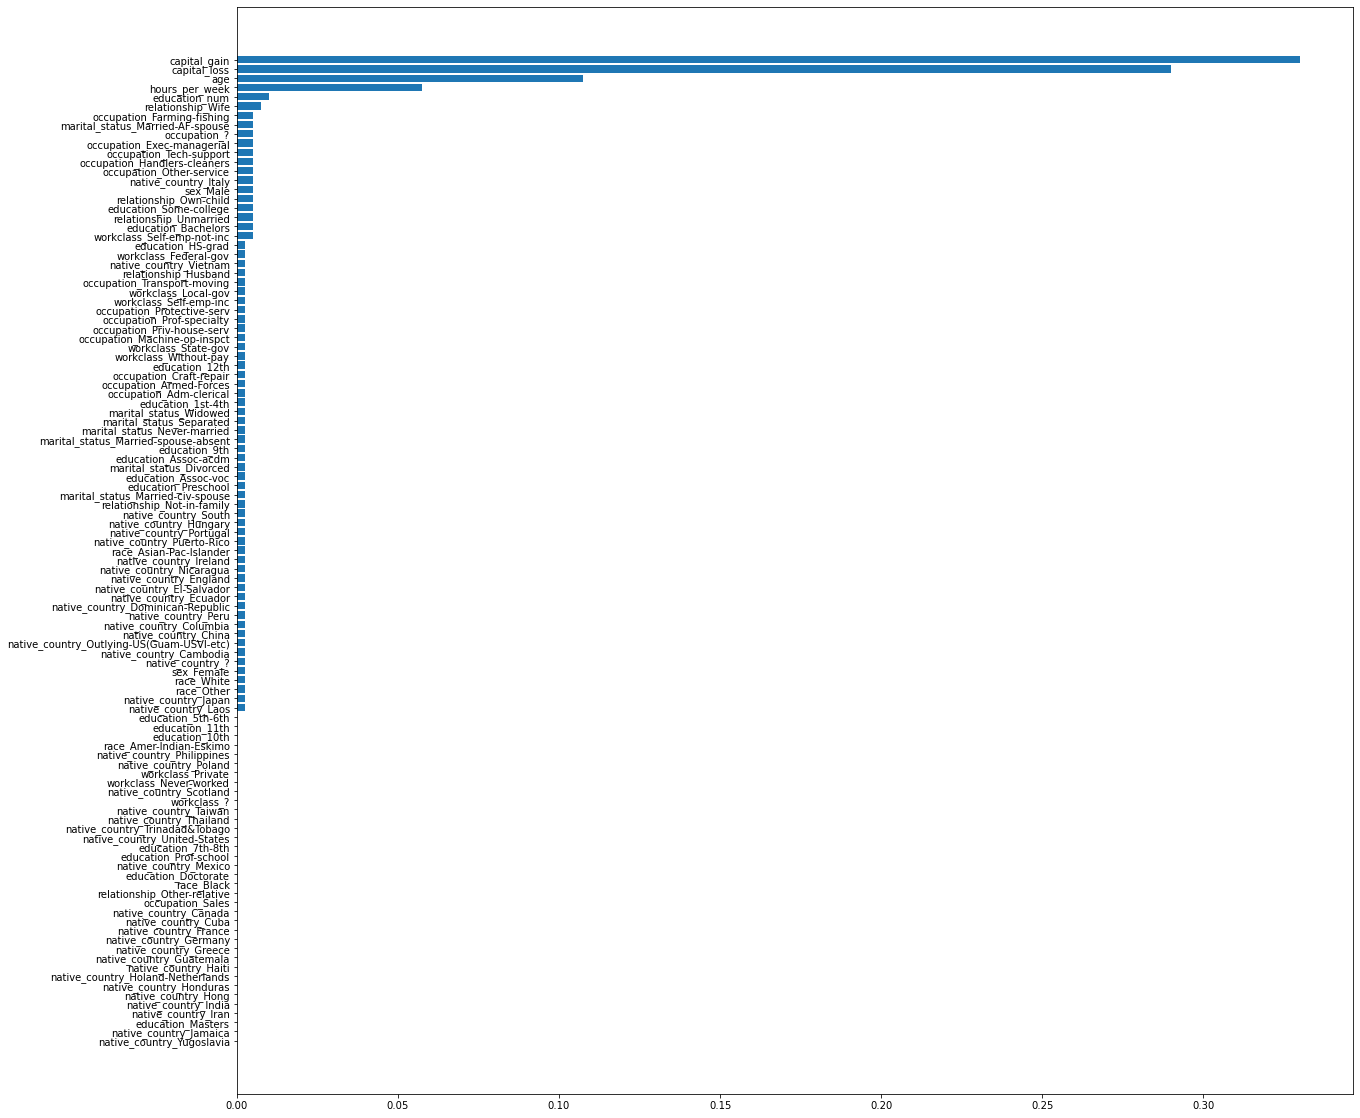

In [28]:
# Identify the top 5 features
# get importance
importance = abc_Grid.best_estimator_.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(20, 20))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

# From the graph below, we know that the top 5 features are:
# capital_gain, capital_loss, age, hours_per_week, and education_num

In [29]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
grid_y_pred_train = abc_Grid.predict(X_train)
grid_y_pred_train_proba = abc_Grid.predict_proba(X_train)
grid_y_pred_train_proba_answer = grid_y_pred_train_proba[:,1]

print(grid_y_pred_train[:10])
print(grid_y_pred_train_proba[:10])
print(grid_y_pred_train_proba_answer[:10])

[0 1 0 0 0 0 1 0 0 0]
[[0.50126488 0.49873512]
 [0.49461247 0.50538753]
 [0.50213001 0.49786999]
 [0.50157048 0.49842952]
 [0.52983781 0.47016219]
 [0.50075858 0.49924142]
 [0.49975489 0.50024511]
 [0.50152116 0.49847884]
 [0.50322446 0.49677554]
 [0.50042839 0.49957161]]
[0.49873512 0.50538753 0.49786999 0.49842952 0.47016219 0.49924142
 0.50024511 0.49847884 0.49677554 0.49957161]


In [30]:
print(classification_report(y_train, grid_y_pred_train))
print(confusion_matrix(y_train, grid_y_pred_train))
print(roc_auc_score(y_train, grid_y_pred_train_proba_answer))
# Are there signs of overfitting? Why or why not?
# There is a sign of overfitting since the training accuracy is higher than the testing one. However, it is not a big 
# deal since it overcomes a little bit (<1%)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792

[[16247  1018]
 [ 1902  3625]]
0.9320490658212577


### 4. Gradient Boosting Classifier - GridSearch

In [31]:
# Create a simple Gradient Boosting Classifier only using default parameters
gbc = GradientBoostingClassifier(random_state=42)

In [32]:
# Look at parameters used by our current gbc model
print('Parameters currently in use:\n')
pprint(gbc.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [33]:
n_estimators = [100, 200, 300, 400]
learning_rate = [0.2,0.4,0.8]
max_depth= [1, 2]
    
# Create the random grid
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth':max_depth}
pprint(param_grid)

{'learning_rate': [0.2, 0.4, 0.8],
 'max_depth': [1, 2],
 'n_estimators': [100, 200, 300, 400]}


In [34]:
# Use the random grid to search for best hyperparameters

# Create gridsearch object with various combinations of parameters
gbc_Grid = GridSearchCV(gbc, param_grid, cv = 5, scoring = 'roc_auc')

gbc_Grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.2, 0.4, 0.8], 'max_depth': [1, 2],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='roc_auc')

In [35]:
# Identify the best performing model:
best_param = gbc_Grid.best_params_

best_grid = gbc_Grid.best_estimator_

print(best_param)
print(best_grid)

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}
GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=400,
                           random_state=42)


In [36]:
# Use the best estimator model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

grid_y_pred = gbc_Grid.predict(X_test)
grid_y_pred_proba = gbc_Grid.predict_proba(X_test)
grid_y_pred_proba_answer = grid_y_pred_proba[:,1]

print(grid_y_pred[:10])
print(grid_y_pred_proba[:10])
print(grid_y_pred_proba_answer[:10])

[0 1 1 0 0 1 1 0 0 1]
[[0.99093585 0.00906415]
 [0.44163911 0.55836089]
 [0.30868258 0.69131742]
 [0.97927682 0.02072318]
 [0.97934514 0.02065486]
 [0.15389339 0.84610661]
 [0.01588277 0.98411723]
 [0.99786047 0.00213953]
 [0.92000244 0.07999756]
 [0.18126552 0.81873448]]
[0.00906415 0.55836089 0.69131742 0.02072318 0.02065486 0.84610661
 0.98411723 0.00213953 0.07999756 0.81873448]


In [37]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, grid_y_pred))
print(confusion_matrix(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

[[7030  425]
 [ 814 1500]]


In [38]:
# Calculate the roc_auc_score for this model.
print(roc_auc_score(y_test, grid_y_pred_proba_answer))

0.9259131568436837


Feature: 0, Score: 0.06223
Feature: 1, Score: 0.17338
Feature: 2, Score: 0.21911
Feature: 3, Score: 0.06679
Feature: 4, Score: 0.04232
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00279
Feature: 7, Score: 0.00179
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00054
Feature: 10, Score: 0.00110
Feature: 11, Score: 0.00305
Feature: 12, Score: 0.00084
Feature: 13, Score: 0.00007
Feature: 14, Score: 0.00013
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00004
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00021
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00001
Feature: 23, Score: 0.00159
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00033
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00035
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.00012
Feature: 31, Score: 0.00071
Feature: 32, Score: 0.36003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00006
Feature: 35, Score: 0.00042
Fe

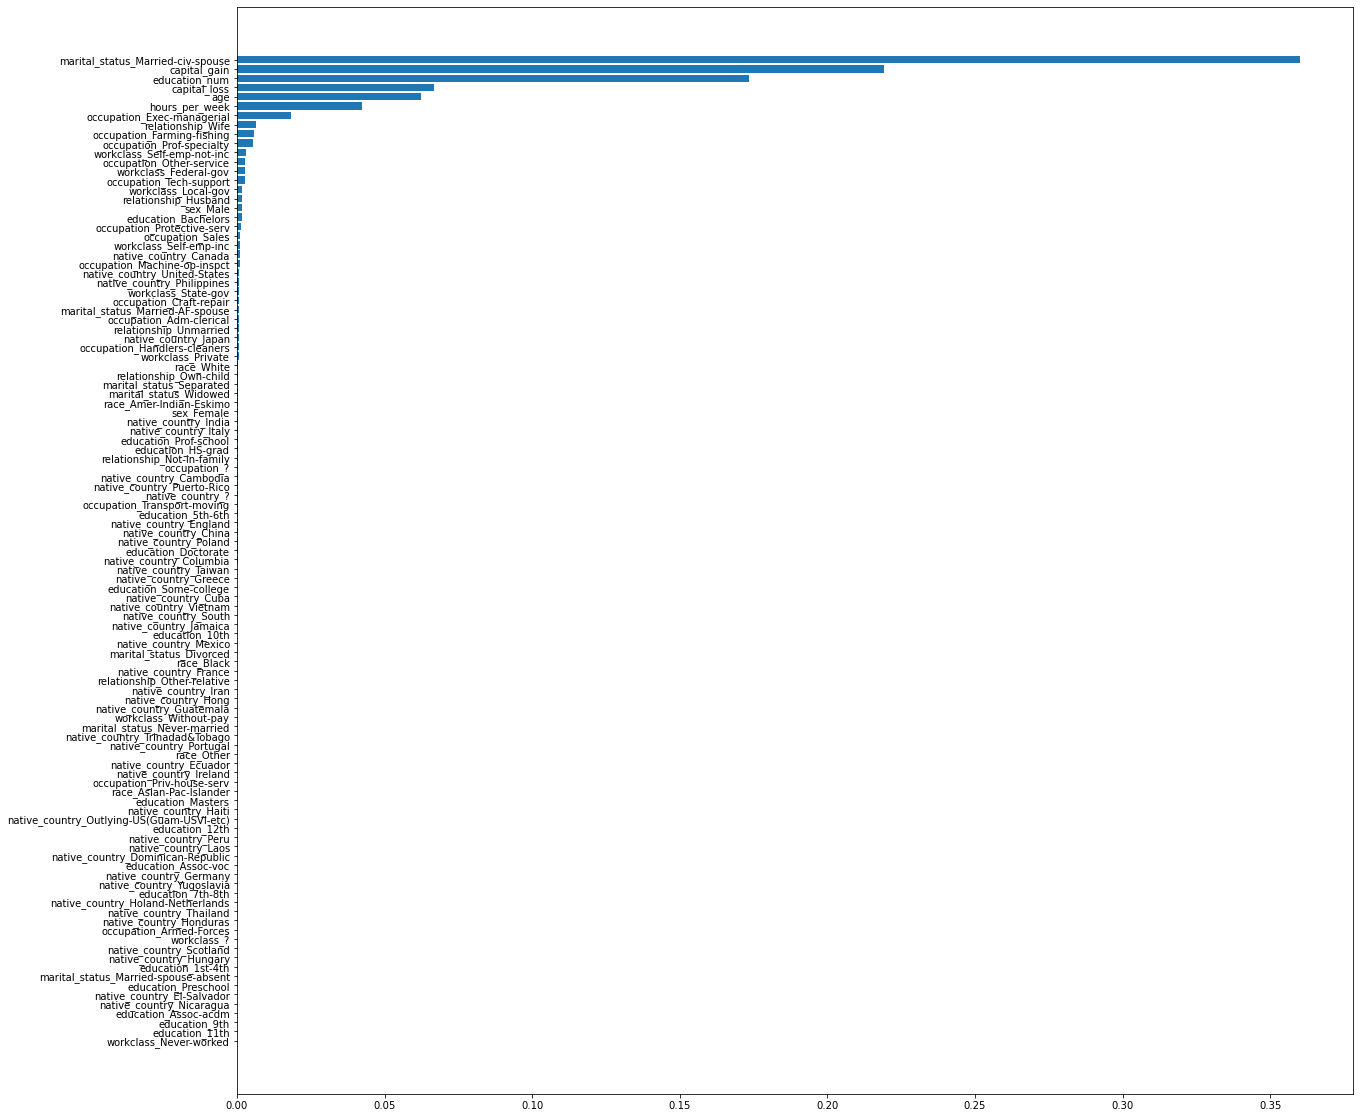

In [39]:
# Identify the top 5 features
# get importance
importance = gbc_Grid.best_estimator_.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(20, 20))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

# From the graph below, we know that the top 5 features are:
# marital_status_married-civ-spouse, capital_gain, education_num, capital_loss, and age

In [40]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
grid_y_pred_train = gbc_Grid.predict(X_train)
grid_y_pred_train_proba = gbc_Grid.predict_proba(X_train)
grid_y_pred_train_proba_answer = grid_y_pred_train_proba[:,1]

print(grid_y_pred_train[:10])
print(grid_y_pred_train_proba[:10])
print(grid_y_pred_train_proba_answer[:10])

[0 1 0 0 0 0 1 0 0 0]
[[9.86277565e-01 1.37224349e-02]
 [1.65511549e-02 9.83448845e-01]
 [9.55491897e-01 4.45081025e-02]
 [9.43049545e-01 5.69504550e-02]
 [9.99501663e-01 4.98336624e-04]
 [9.00816701e-01 9.91832992e-02]
 [4.75377216e-01 5.24622784e-01]
 [9.68393261e-01 3.16067388e-02]
 [9.72965035e-01 2.70349653e-02]
 [6.78713796e-01 3.21286204e-01]]
[1.37224349e-02 9.83448845e-01 4.45081025e-02 5.69504550e-02
 4.98336624e-04 9.91832992e-02 5.24622784e-01 3.16067388e-02
 2.70349653e-02 3.21286204e-01]


In [41]:
print(classification_report(y_train, grid_y_pred_train))
print(confusion_matrix(y_train, grid_y_pred_train))
print(roc_auc_score(y_train, grid_y_pred_train_proba_answer))
# Are there signs of overfitting? Why or why not?
# There is a sign of overfitting since the training accuracy is higher than the testing one. However, it is not a big 
# deal since it overcomes a little bit (<1%)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792

[[16388   877]
 [ 1828  3699]]
0.9391851423004075


### 5. XGBoost - RandomizedSearchCV

In [42]:
# Create a simple XGBoost Classifier only using default parameters
xgb = XGBClassifier(random_state=42)

In [43]:
# Look at parameters used by our current xgb model
print('Parameters currently in use:\n')
pprint(xgb.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'use_label_encoder': True,
 'validate_parameters': None,
 'verbosity': None}


In [44]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 19)]
learning_rate = [x for x in np.linspace(start = 0.1, stop = 1.6, num = 16)]
max_depth= [1, 2]
gamma = [x for x in np.linspace(start = 0, stop = 5, num = 21)]
    
# Create the random grid
param_grid = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'max_depth':max_depth,
              'gamma':gamma}

In [45]:
# Use the RandomizedSearchCV to search for best hyperparameters

# Create object with various combinations of parameters
xgb_rand = RandomizedSearchCV(xgb, param_grid, cv = 5, scoring = 'roc_auc')

xgb_rand.fit(X_train, y_train)

[18:38:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:38:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:39:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:45:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:45:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:46:16] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                                  2.5, 2.75, 3.0, 3.25, 3.5,
                                                  3.75, 4.0, 4.25, 4.5, 4.75,
                          

In [46]:
# Identify the best performing model:
best_param = xgb_rand.best_params_

best_grid = xgb_rand.best_estimator_

print(best_param)
print(best_grid)

{'n_estimators': 600, 'max_depth': 1, 'learning_rate': 1.3000000000000003, 'gamma': 0.0}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.3000000000000003, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [47]:
# Use the best estimator model to predict on test data. 
# Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

rand_y_pred = xgb_rand.predict(X_test)
rand_y_pred_proba = xgb_rand.predict_proba(X_test)
rand_y_pred_proba_answer = rand_y_pred_proba[:,1]

print(rand_y_pred[:10])
print(rand_y_pred_proba[:10])
print(rand_y_pred_proba_answer[:10])

[0 1 1 0 0 1 1 0 0 1]
[[9.8930764e-01 1.0692361e-02]
 [4.1917503e-01 5.8082497e-01]
 [3.9462095e-01 6.0537905e-01]
 [9.7826678e-01 2.1733228e-02]
 [9.9690825e-01 3.0917297e-03]
 [1.6184014e-01 8.3815986e-01]
 [3.2031536e-04 9.9967968e-01]
 [9.9869734e-01 1.3026356e-03]
 [9.1480863e-01 8.5191384e-02]
 [8.3899081e-02 9.1610092e-01]]
[0.01069236 0.580825   0.60537905 0.02173323 0.00309173 0.83815986
 0.9996797  0.00130264 0.08519138 0.9161009 ]


In [48]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, rand_y_pred))
print(confusion_matrix(y_test, rand_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769

[[7023  432]
 [ 817 1497]]


In [49]:
# Calculate the roc_auc_score for this model.
print(roc_auc_score(y_test, rand_y_pred_proba_answer))

0.9258622898439325


Feature: 0, Score: 0.00379
Feature: 1, Score: 0.05729
Feature: 2, Score: 0.00304
Feature: 3, Score: 0.00110
Feature: 4, Score: 0.00350
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00711
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00296
Feature: 10, Score: 0.00227
Feature: 11, Score: 0.00070
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00018
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00008
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00034
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00033
Feature: 22, Score: 0.00028
Feature: 23, Score: 0.03662
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00028
Feature: 26, Score: 0.00839
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.78374
Feature: 33, Score: 0.00011
Feature: 34, Score: 0.00042
Feature: 35, Score: 0.00000
Fe

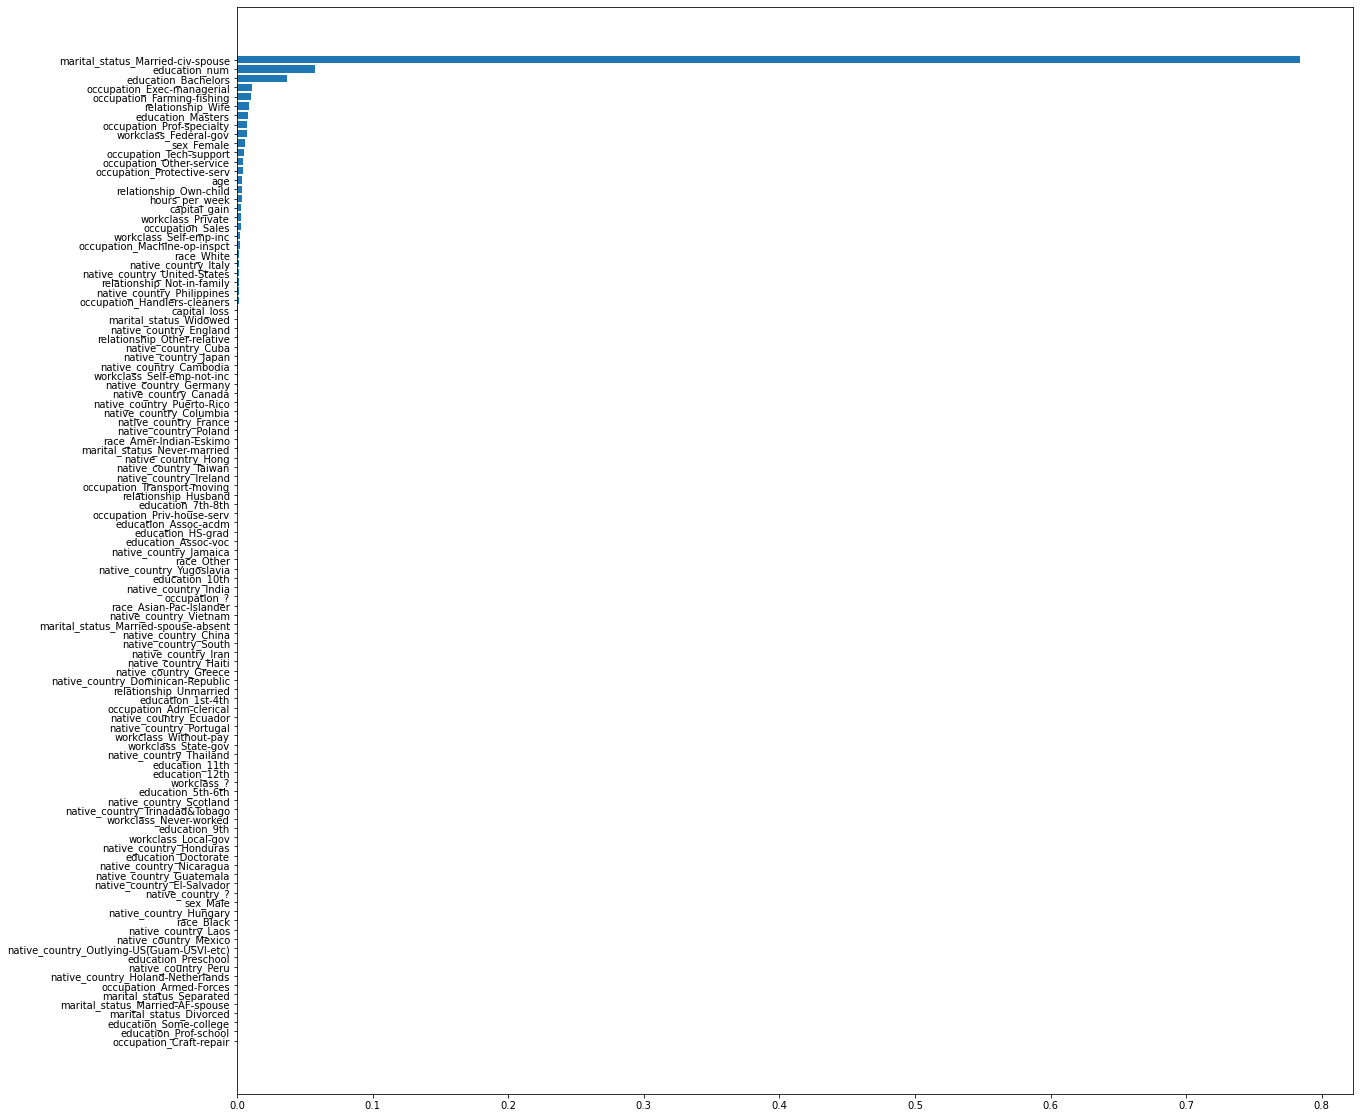

In [50]:
# Identify the top 5 features
# get importance
importance = xgb_rand.best_estimator_.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(20, 20))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

# From the graph below, we know that the top 5 features are:
# marital_status_married-civ-spouse, education_num, education_Bachelors, occupation_exec-managerial, and occupation farming-fishing

In [51]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
rand_y_pred_train = xgb_rand.predict(X_train)
rand_y_pred_train_proba = xgb_rand.predict_proba(X_train)
rand_y_pred_train_proba_answer = rand_y_pred_train_proba[:,1]

print(rand_y_pred_train[:10])
print(rand_y_pred_train_proba[:10])
print(rand_y_pred_train_proba_answer[:10])

[0 1 0 0 0 0 1 0 0 0]
[[9.7665513e-01 2.3344856e-02]
 [2.5554895e-03 9.9744451e-01]
 [9.6528614e-01 3.4713887e-02]
 [9.5501333e-01 4.4986669e-02]
 [9.9997777e-01 2.2248560e-05]
 [8.7714016e-01 1.2285982e-01]
 [3.6751527e-01 6.3248473e-01]
 [9.6294177e-01 3.7058219e-02]
 [9.8959297e-01 1.0407042e-02]
 [6.3034046e-01 3.6965951e-01]]
[2.3344856e-02 9.9744451e-01 3.4713887e-02 4.4986669e-02 2.2248560e-05
 1.2285982e-01 6.3248473e-01 3.7058219e-02 1.0407042e-02 3.6965951e-01]


In [53]:
print(classification_report(y_train, rand_y_pred_train))
print(confusion_matrix(y_train, rand_y_pred_train))
print(roc_auc_score(y_train, rand_y_pred_train_proba_answer))
# Are there signs of overfitting? Why or why not?
# There is a sign of overfitting since the training accuracy is higher than the testing one. However, it is not a big 
# deal since it overcomes a little bit (<1%)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.79      0.66      0.72      5527

    accuracy                           0.88     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.88      0.87     22792

[[16314   951]
 [ 1885  3642]]
0.9333853225387353


### 5. Conceptual Questions

1. What does the alpha parameter represent in AdaBoost? 

---- It represents the output weight for that classifier. To be more specific, it is calculated by: 

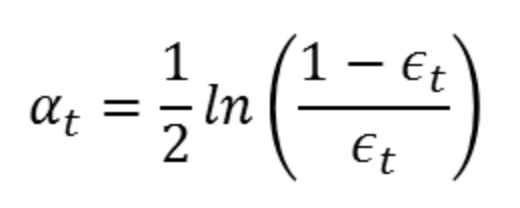

In [54]:
from IPython import display
display.Image("./alpha.png", width=100, height=100)

---- It’s based on the classifier’s error rate. Et is the number of misclassifications over the training set divided by the training set size, and 1/2 in this case, it's the learning rate. 

2. In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

---- AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones. We start by creating a model from the training data. Then, we create a second model from the previous one by trying to reduce the errors from the previous model. Models are added sequentially, each correcting its predecessor, until the training data is predicted perfectly or the maximum number of models have been added. To be more specific, we assume all points are equally weighted at first. Then, we weighted error rate of predictors (gamma). We use this gamma to weight predictor #1, that comes to how to calculate alpha: using the learning rate and the weighted error rate. Next, we update each instance weights and determine which are correctly classified and which are misclassified. We then normalize the weights and repeated what we've done again and again until reach the end. 

3. In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter? 

---- Max_depth represents the maximum depth of a tree. The deeper the tree, the more splits it has and it captures more information about how the data. By tuning this parameter using the cross validation, it is used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. 

4. In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

---- age, hours_per_week, capital_gain, marital_status_Married-civ-spouse, and education_num

---- capital_gain, capital_loss, age, hours_per_week, and education_num

---- marital_status_married-civ-spouse, capital_gain, education_num, capital_loss, and age

---- We can see that age, capital_gain, and education_num show up in all three models. These all predictors make sense because: for the age, the elder people become, the more income they may have because of the build-up experiences. For the capital_gain, the more money people have, the more likely they know how to make money, and the more income they have each year. Similar for the education_num, the higher educational status people have, the more likely they will get the job with higher salaries, the more income they will get enventually. 

5. From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

---- For my model, the Gradient Boosting Classifier performs the best with the highest accuracy score. The best parameters found by the grid search are:

---- {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 400}
GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=400,
                           random_state=42)

6. For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.

---- An ROC curve shows the relationship between clinical sensitivity and specificity for every possible cut-off.

---- The x-axis showing 1 – specificity (= false positive fraction = FP/(FP+TN))

---- The y-axis showing sensitivity (= true positive fraction = TP/(TP+FN))

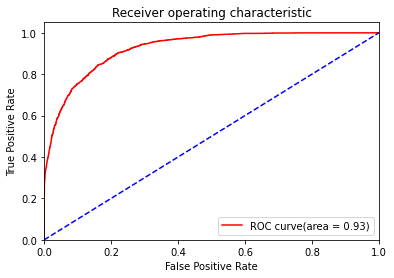

In [63]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, grid_y_pred_proba_answer)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()